## Q1

In [4]:
# Principal Component Analysis
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def standardize(df1):
    scaler=StandardScaler()
    df1=scaler.fit_transform(df1)
    return pd.DataFrame(df1)


# define a matrix
A = standardize(np.array([[8,14,3],[13,9,6],[4,3,15],[7,2,1],[19,8,4],[5,18,11]]))

# create the PCA instance
pca = PCA(1)

# fit on data
pca.fit(A)

# transform data
B = pca.transform(A)
print('Final answer:')
print(B)

Final answer:
[[-0.20423593]
 [-0.58697404]
 [ 1.74081123]
 [-0.71095189]
 [-1.70802694]
 [ 1.46937756]]


## Q2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

In [6]:
def standardize(df1):
    scaler=StandardScaler()
    df1=scaler.fit_transform(df1)
    return pd.DataFrame(df1)

In [ ]:
def pca_func(data):
  pca = PCA(n_components=2,svd_solver='full')
  pca=pca.fit(data)

  #Transform data to 2D
  data_encoded=pca.transform(data)

  #Regenerate 3D data from 2 features
  data_decoded=pd.DataFrame(pca.inverse_transform(data_encoded))
  comp=pca.components_

  #Principal components
  print('Components:')
  print(comp)

  #Plot original data
  fig = plt.figure(figsize=[8,5])
  ax = plt.axes(projection='3d')
  ax.plot3D(data[0],data[1], data[2],'gray')
  for i in range(len(pca.components_)):
      exp_var = pca.explained_variance_[i]
      component = pca.components_[i]
      p_component_with_length = component*3*np.sqrt(exp_var)
      PC = list(zip(pca.mean_,pca.mean_ + p_component_with_length))
      ax.plot(PC[0],PC[1],PC[2],'k')
  plt.title('Original standardized data')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

  #Plot regained data after performing PCA
  fig = plt.figure(figsize=[8,5])
  ax = plt.axes(projection='3d')
  ax.plot3D(data_decoded[0],data_decoded[1], data_decoded[2],'gray')
  for i in range(len(pca.components_)):
      exp_var = pca.explained_variance_[i]
      component = pca.components_[i]
      p_component_with_length = component*3*np.sqrt(exp_var)
      PC = list(zip(pca.mean_,pca.mean_ + p_component_with_length))
      ax.plot(PC[0],PC[1],PC[2],'k')
  plt.title('Regained data')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

  #Plot 2D figure
  plt.scatter(data_encoded[:,0],data_encoded[:,1])
  plt.axhline(y=0,color='k')
  plt.axvline(x=0,color='k')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title('2D transformed data')
  plt.grid(True)
  plt.show()

  #Calculate error
  rmse = mse(data, data_decoded, squared=False)
  print('RMSE between original and regained data after PCA: ',rmse)

  r2 = r2_score(data, data_decoded)
  print('R2_score between original and regained data after PCA: ',r2)

In [ ]:
#Read data
data1 = pd.read_csv('P_1.txt', sep=" ", header=None)
data2 = pd.read_csv('P_2.txt', sep=" ", header=None)
data3 = pd.read_csv('P_3.txt', sep=" ", header=None)
data4 = pd.read_csv('P_4.txt', sep=" ", header=None)
data5 = pd.read_csv('P_5.txt', sep=" ", header=None)

In [ ]:
#Standardize the data for performing PCA
data1=standardize(data1)
data2=standardize(data2)
data3=standardize(data3)
data4=standardize(data4)
data5=standardize(data5)
cols=data1.columns

### P_1

In [ ]:
data1.head()

,0,1,2
0,0.815756,1.708647,-0.345913
1,0.815759,1.600698,-0.206823
2,0.815768,1.252523,0.115454
3,0.827666,1.380933,0.016475
4,0.819393,1.458677,-0.062880


Components:
[[-0.71246365 -0.20299258 -0.67170645]
 [ 0.04283359  0.94287758 -0.33037427]]


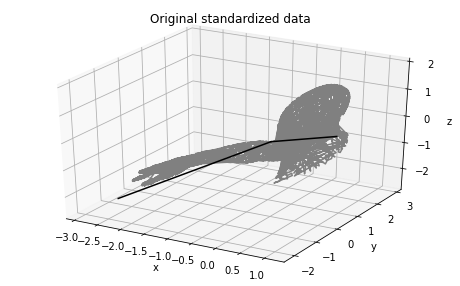

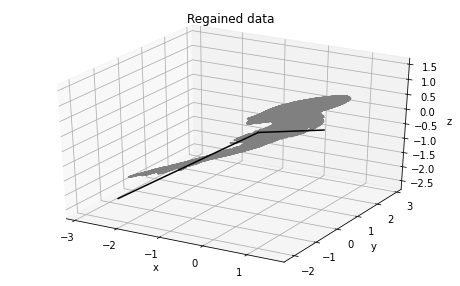

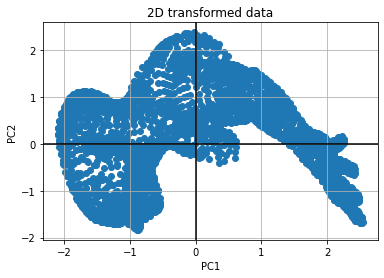

RMSE between original and regained data after PCA:  0.22275175421198848
R2_score between original and regained data after PCA:  0.950381655995482


In [ ]:
pca_func(data1)

###P_2

Components:
[[ 0.59413162 -0.59119126  0.54543608]
 [ 0.36228137 -0.40874788 -0.83766185]]


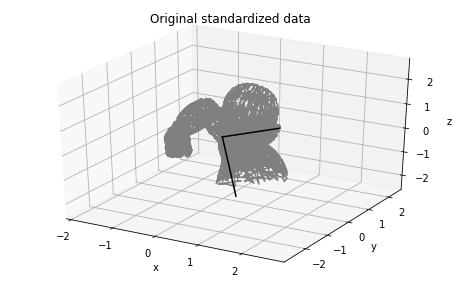

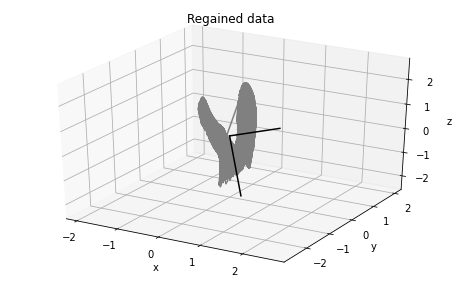

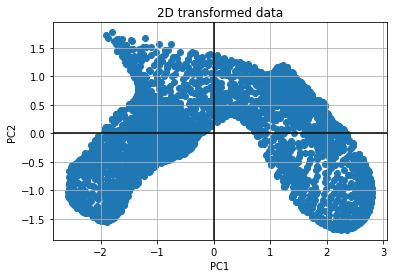

RMSE between original and regained data after PCA:  0.33047676980371476
R2_score between original and regained data after PCA:  0.8907851046201025


In [ ]:
pca_func(data2)

###P_3


Components:
[[ 0.63511685  0.55243544 -0.53985338]
 [ 0.02572969  0.68339641  0.72959395]]


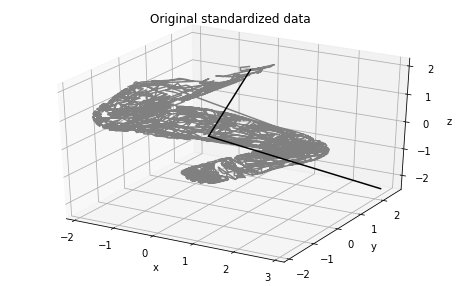

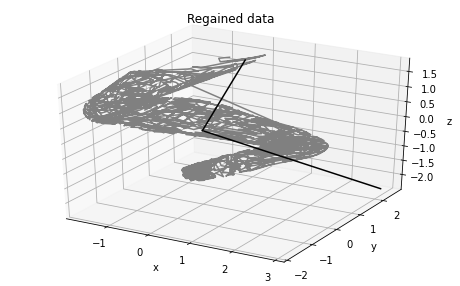

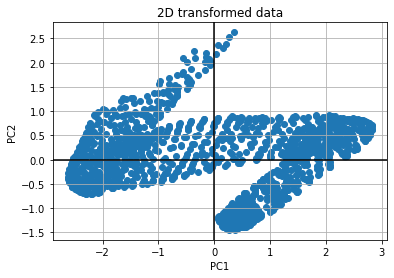

RMSE between original and regained data after PCA:  0.2172064585432221
R2_score between original and regained data after PCA:  0.9528213543671115


In [ ]:
pca_func(data3)

###P_4

Components:
[[ 0.59136935 -0.58434117  0.55572268]
 [-0.3156906   0.46637798  0.8263359 ]]


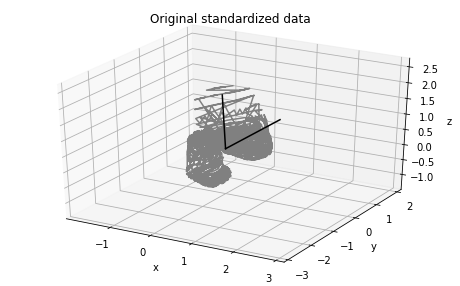

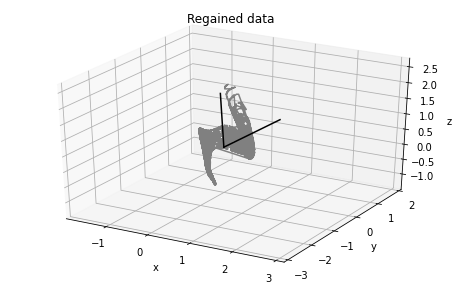

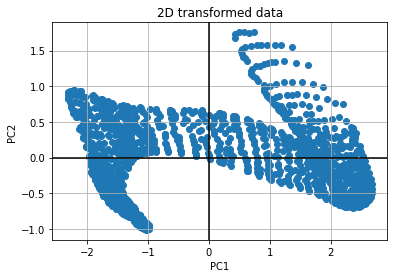

RMSE between original and regained data after PCA:  0.2004831869645235
R2_score between original and regained data after PCA:  0.959806491744548


In [ ]:
pca_func(data4)

###P_5

Components:
[[ 0.7130749  -0.22655321  0.66347406]
 [-0.04082255  0.93132659  0.36188991]]


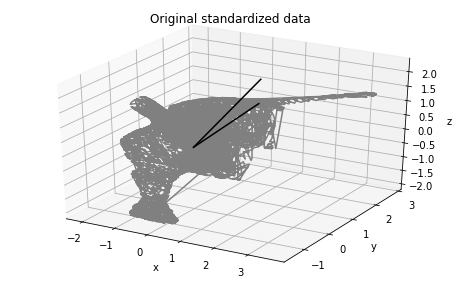

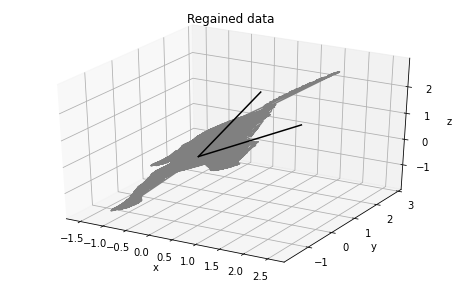

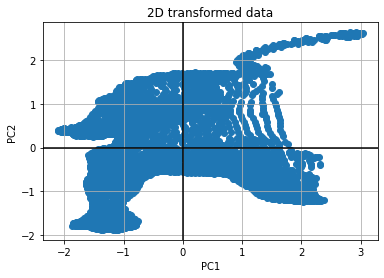

RMSE between original and regained data after PCA:  0.43832755815686913
R2_score between original and regained data after PCA:  0.8078689517602364


In [ ]:
pca_func(data5)